# Segment anything

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [3]:
image = cv2.imread('305.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

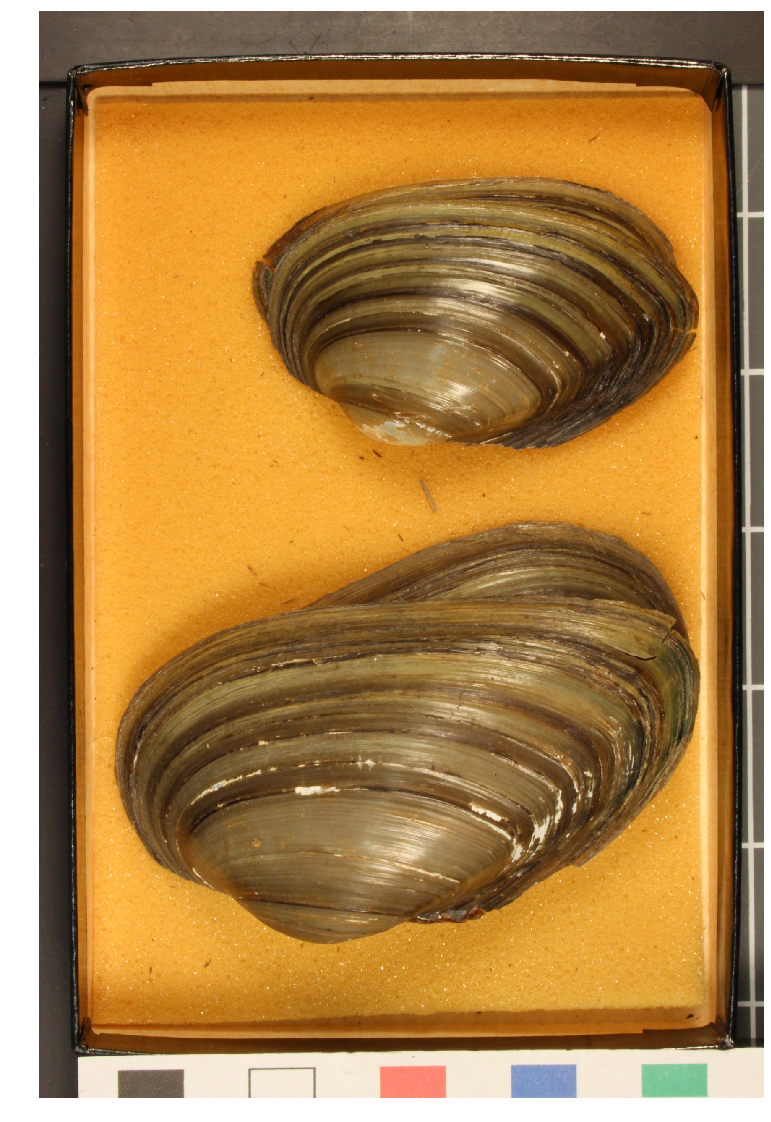

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [7]:
masks = mask_generator.generate(image)

In [8]:
print(len(masks))
print(masks[0].keys())

24
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


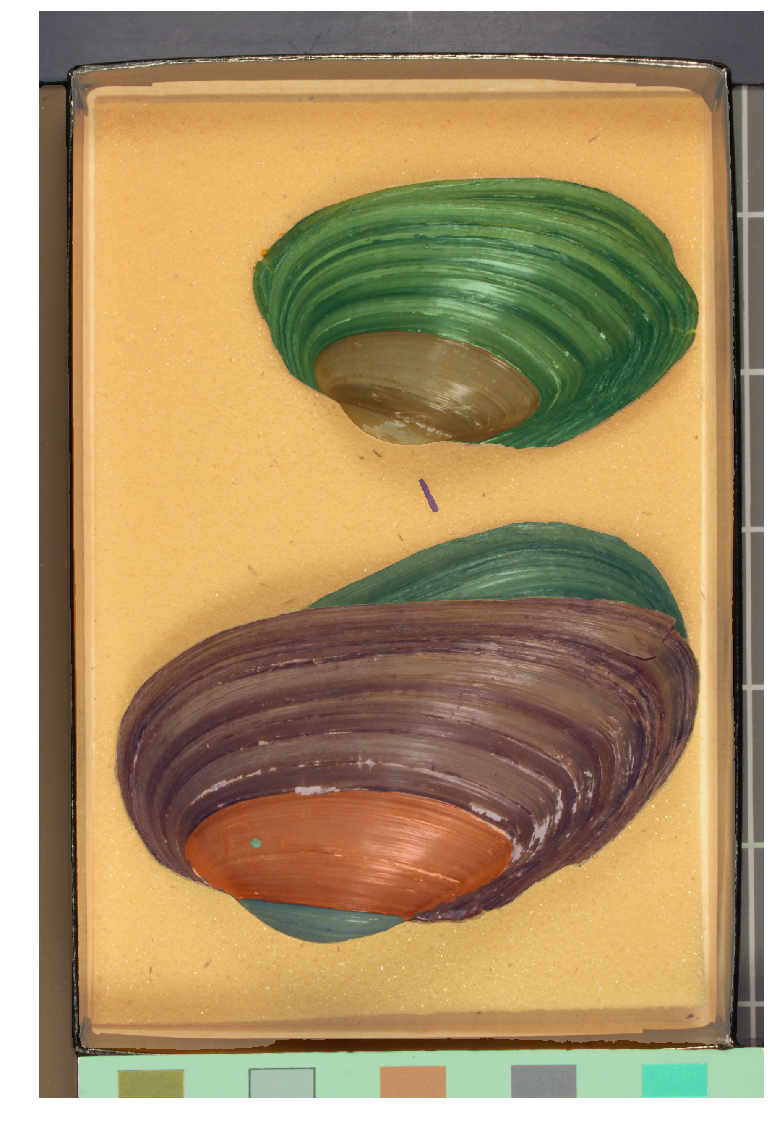

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

# For the whole drawer image

Top view

In [6]:
image = cv2.imread('20230728_01.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(image)

In [7]:
print(len(masks))
print(masks[0].keys())

72
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


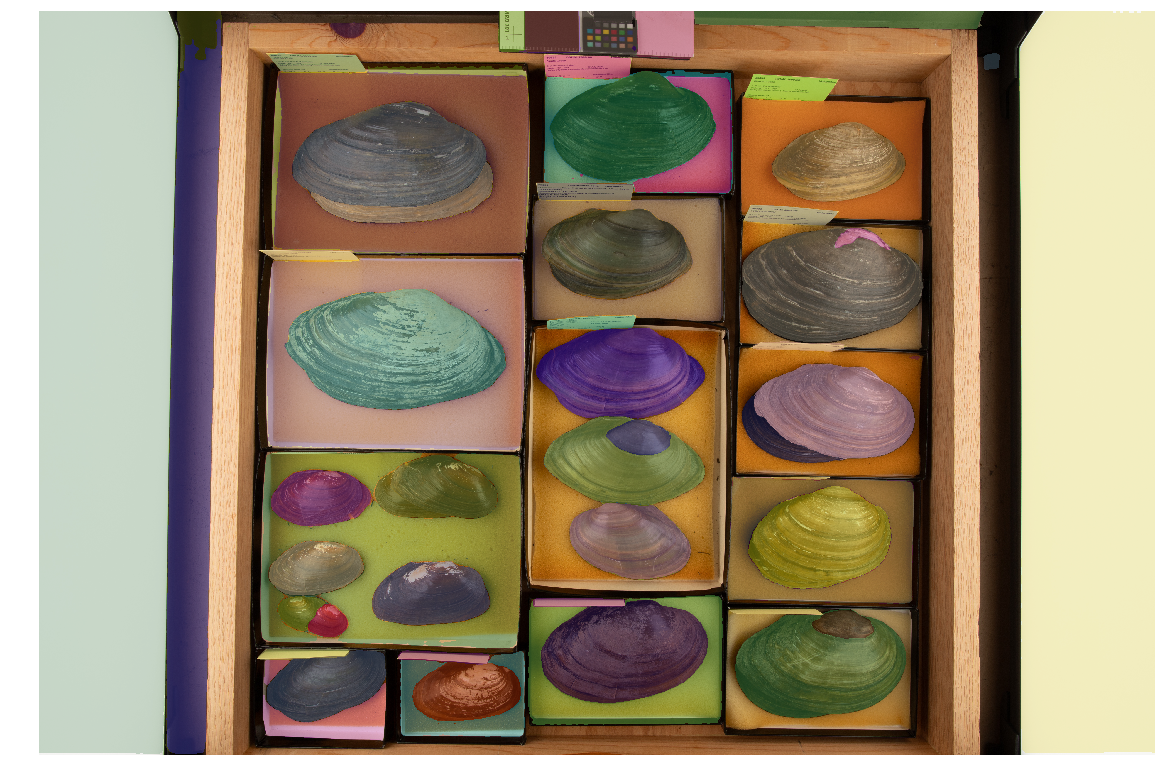

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [9]:
masks

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 408478,
  'bbox': [2859, 335, 925, 619],
  'predicted_iou': 1.0193959474563599,
  'point_coords': [[3607.5, 585.0]],
  'stability_score': 0.9908354878425598,
  'crop_box': [0, 0, 6240, 4160]},
 {'segmentation': array([[False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 3090229,
  'bbox': [5482, 0

Front view

In [4]:
image = cv2.imread('20230728_01F.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(image)

In [5]:
print(len(masks))
print(masks[0].keys())

111
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


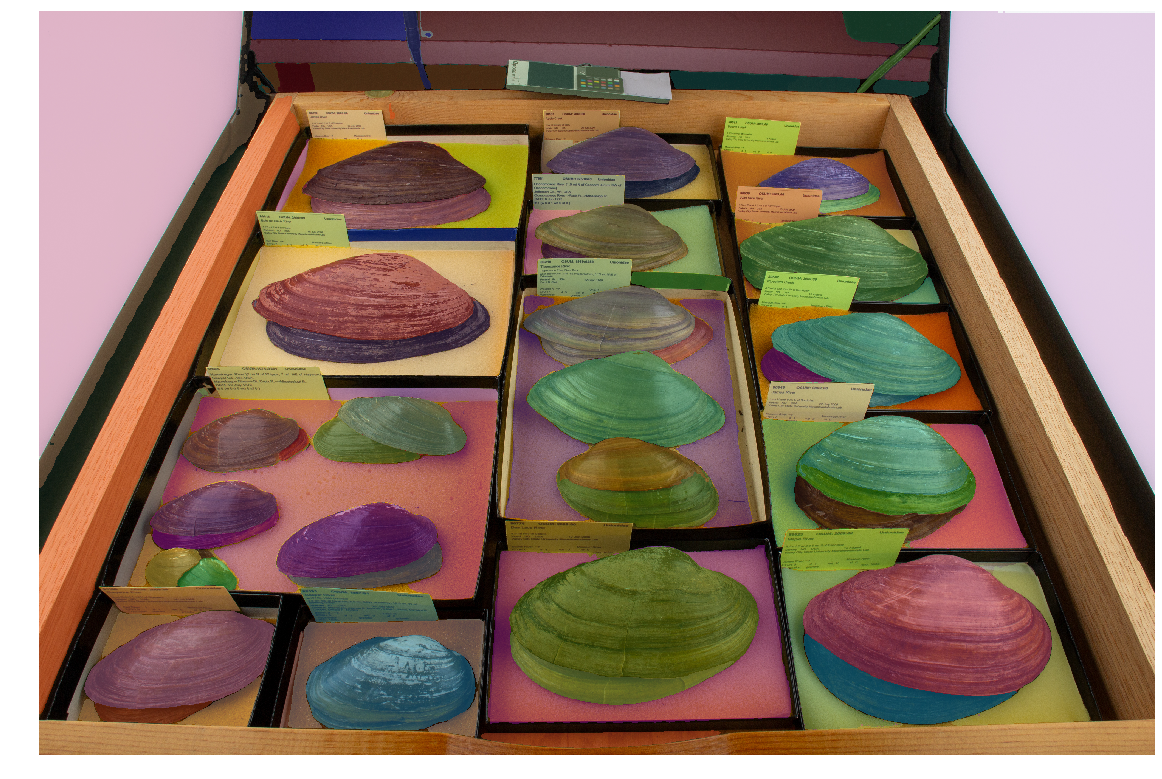

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [7]:
masks

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 1287011,
  'bbox': [4215, 0, 968, 2226],
  'predicted_iou': 1.0217176675796509,
  'point_coords': [[4617.0, 54.0]],
  'stability_score': 0.9905369281768799,
  'crop_box': [0, 0, 5184, 3456]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 635958,
  'bbox': [2185, 248

In [8]:
# Extract 'bbox' values from all dictionaries in 'masks'
all_bbox_values = [mask['bbox'] for mask in masks]

# Print the extracted 'bbox' values
for idx, bbox in enumerate(all_bbox_values):
    x, y, width, height = bbox
    print(f"Object {idx + 1} Bounding Box: x={x}, y={y}, width={width}, height={height}")

Object 1 Bounding Box: x=4215, y=0, width=968, height=2226
Object 2 Bounding Box: x=2185, y=2487, width=1158, height=734
Object 3 Bounding Box: x=1105, y=2283, width=766, height=399
Object 4 Bounding Box: x=2406, y=1980, width=751, height=421
Object 5 Bounding Box: x=0, y=0, width=943, height=2064
Object 6 Bounding Box: x=210, y=2785, width=883, height=523
Object 7 Bounding Box: x=990, y=1119, width=1104, height=517
Object 8 Bounding Box: x=3549, y=2526, width=1154, height=784
Object 9 Bounding Box: x=779, y=1651, width=568, height=154
Object 10 Bounding Box: x=2313, y=1147, width=441, height=182
Object 11 Bounding Box: x=3354, y=1401, width=929, height=433
Object 12 Bounding Box: x=1214, y=2678, width=640, height=162
Object 13 Bounding Box: x=2255, y=1366, width=931, height=660
Object 14 Bounding Box: x=2360, y=538, width=708, height=330
Object 15 Bounding Box: x=1239, y=2897, width=788, height=444
Object 16 Bounding Box: x=3510, y=1881, width=840, height=587
Object 17 Bounding Box: x

In [9]:
all_bbox_values

[[4215, 0, 968, 2226],
 [2185, 2487, 1158, 734],
 [1105, 2283, 766, 399],
 [2406, 1980, 751, 421],
 [0, 0, 943, 2064],
 [210, 2785, 883, 523],
 [990, 1119, 1104, 517],
 [3549, 2526, 1154, 784],
 [779, 1651, 568, 154],
 [2313, 1147, 441, 182],
 [3354, 1401, 929, 433],
 [1214, 2678, 640, 162],
 [2255, 1366, 931, 660],
 [2360, 538, 708, 330],
 [1239, 2897, 788, 444],
 [3510, 1881, 840, 587],
 [2250, 1277, 880, 369],
 [3447, 2402, 589, 196],
 [520, 2184, 585, 257],
 [3171, 493, 365, 176],
 [2266, 1577, 920, 449],
 [1223, 606, 875, 407],
 [1225, 607, 847, 292],
 [3254, 950, 876, 398],
 [670, 1851, 580, 289],
 [1104, 1927, 767, 754],
 [3364, 1723, 513, 185],
 [3233, 815, 404, 171],
 [2305, 896, 709, 309],
 [4043, 1917, 546, 579],
 [433, 1793, 1695, 939],
 [2166, 2366, 590, 152],
 [3344, 682, 561, 258],
 [1009, 927, 431, 171],
 [1388, 1789, 597, 273],
 [3554, 2896, 986, 417],
 [3343, 1209, 465, 182],
 [980, 0, 3194, 328],
 [2344, 461, 351, 154],
 [2291, 755, 429, 171],
 [3732, 0, 451, 158],
 

In [10]:
# Extract 'bbox' values from all dictionaries in 'masks'
all_bbox_values = [mask['bbox'] for mask in masks]

# Print the extracted 'bbox' values
for idx, bbox in enumerate(all_bbox_values):
    x, y, width, height = bbox
    
    if ((640 <= width <= 720) or (220 <= width <= 300)) and ((175 <= height <= 255) or (190 <= height <= 330)):
        print(f"Object {idx + 1} Bounding Box: x={x}, y={y}, width={width}, height={height}")

Object 14 Bounding Box: x=2360, y=538, width=708, height=330
Object 29 Bounding Box: x=2305, y=896, width=709, height=309
Object 51 Bounding Box: x=493, y=2494, width=260, height=182
Object 65 Bounding Box: x=1158, y=2470, width=713, height=212
Object 66 Bounding Box: x=2417, y=1980, width=714, height=251
Object 94 Bounding Box: x=2849, y=1423, width=282, height=213


# Vertically transformed images

In [17]:
image = cv2.imread('test2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(image)

In [18]:
print(len(masks))
print(masks[0].keys())

123
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


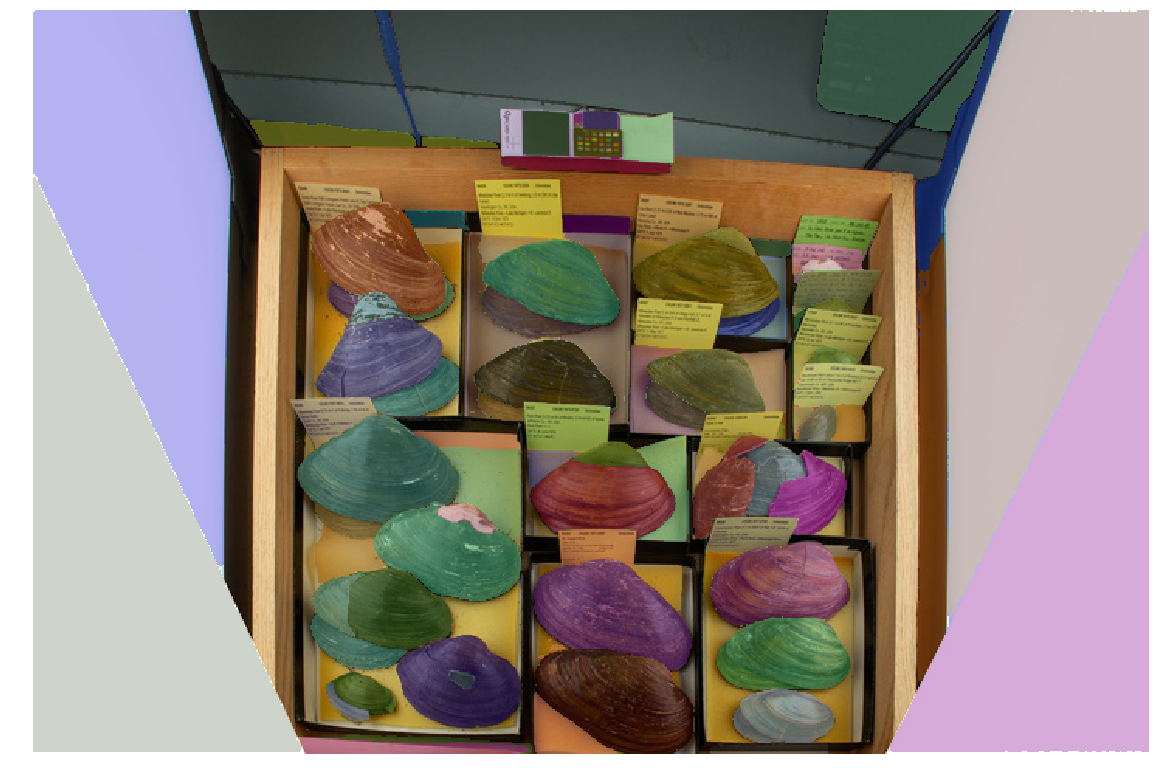

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 